In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import numpy as np

In [3]:
surveys = pd.read_csv('data/surveys.csv') # dataframe

In [4]:
surveys # prints the entire table

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [5]:
surveys['weight'] # prints specific column

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
35519    36.0
35520    48.0
35521    45.0
35522    44.0
35523    27.0
35524    26.0
35525    24.0
35526    43.0
35527     NaN
35528    25.0
35529     NaN
35530     NaN
35531    43.0
35532    48.0
35533    56.0
35534    53.0
35535    42.0
35536    46.0
35537    31.0
35538    68.0
35539    23.0
35540    31.0
35541    29.0
35542    34.0
35543     NaN
35544     NaN
35545     NaN
35546    14.0
35547    51.0
35548     NaN
Name: weight, Length: 35549, dtype: float64

In [6]:
surveys.dtypes # check data types of all columns

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

Pandas types -> python type  
object -> string  
int64 -> int  
float64 -> float  

In [7]:
surveys['weight'].dtype # check data type of specific column

dtype('float64')

In [8]:
surveys['year'].unique() # check unique entries

array([1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002])

In [9]:
surveys['species_id'].unique()

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [10]:
dir(surveys)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',


### Plotting data

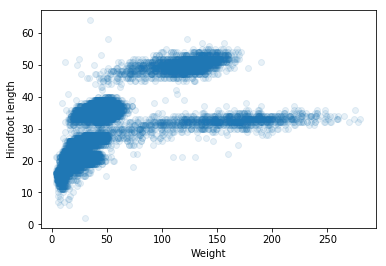

In [11]:
weight = surveys['weight']
hf_length = surveys['hindfoot_length']

plt.scatter(weight, hf_length, alpha=0.1)
plt.xlabel('Weight')
plt.ylabel('Hindfoot length')
plt.show()

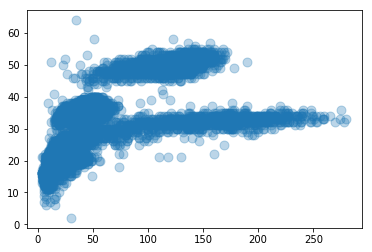

In [12]:
plt.scatter(weight, hf_length, s=80, alpha=0.3)
plt.show()
# s means scalar, size of the marker

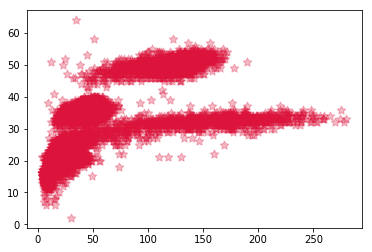

In [13]:
plt.scatter(weight, hf_length, s=80, alpha=0.3, marker=(5,1), c='crimson')
plt.show()
# other marker options https://matplotlib.org/gallery/lines_bars_and_markers/scatter_star_poly.html#sphx-glr-gallery-lines-bars-and-markers-scatter-star-poly-py
# all possible markers: https://matplotlib.org/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle
# color names: https://matplotlib.org/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py

In [14]:
year = surveys['year']

In [15]:
df_weigth_year = pd.DataFrame({'weight': weight, 'year': year})
df_weigth_year

,weight,year
0,NaN,1977
1,NaN,1977
2,NaN,1977
3,NaN,1977
4,NaN,1977
5,NaN,1977
6,NaN,1977
7,NaN,1977
8,NaN,1977
9,NaN,1977


In [16]:
df_weigth_year.isnull().any() # test if columns have NaN

weight     True
year      False
dtype: bool

In [17]:
df_weigth_year.dtypes

weight    float64
year        int64
dtype: object

In [18]:
filtered_df_w_y= df_weigth_year[df_weigth_year.weight > 0]
filtered_df_w_y # remove NaN

,weight,year
62,40.0,1977
63,48.0,1977
64,29.0,1977
65,46.0,1977
66,36.0,1977
67,52.0,1977
68,8.0,1977
69,22.0,1977
70,35.0,1977
73,7.0,1977


In [19]:
# subsettind Data using Criteria
subset= filtered_df_w_y[filtered_df_w_y.year > 1990]
subset

,weight,year
18189,11.0,1991
18190,31.0,1991
18191,9.0,1991
18192,48.0,1991
18193,36.0,1991
18194,11.0,1991
18195,43.0,1991
18196,31.0,1991
18197,32.0,1991
18199,21.0,1991


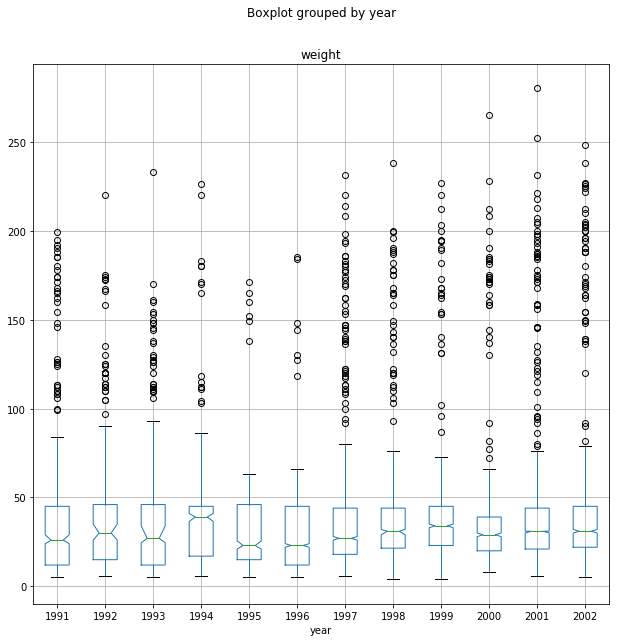

In [20]:
subset.boxplot('weight', by='year', notch=True, figsize=(10, 10), fontsize=10, bootstrap=1000)

# Statistics

Crop Science 

Completely Randomized Block Design Experiment  
Dr. M. Smith's class Spring 2015

The study was foliar applications of urea on ‘Pawnee’ pecan applied starting at the parachute stage of budbreak, then at two week intervals for a total of three applications. Application rates were 0, 0.2, 0.4, 0.6 and 0.8% N derived from urea (46% N). Leaf samples were collected in July and October using the middle leaflet pair of the compound leaf located at the mid-point of current season’s shoot growth. Nitrogen was analyzed with a Leco N analyzer. Pecans were in November and weighed.

In [455]:
pecan_data = pd.read_csv('data/Smith_pecan_data.csv', sep=',', na_values='.')
#pecan_df = pd.DataFrame(pecan_data)
# if add argument na_values='.', will substitute '.' to NaN

In [456]:
pecan_data.head(15)

,n_rate,rep,july,oct,yield
0,0.0,1,2.57,2.03,12.0
1,0.0,2,2.78,2.12,19.0
2,0.0,3,2.47,2.16,22.0
3,0.0,4,2.59,2.09,30.0
4,0.0,5,2.53,2.00,18.0
5,0.0,6,2.33,1.97,22.0
6,0.0,7,2.50,2.04,23.0
7,0.0,8,2.64,2.10,NaN
8,0.0,9,2.37,1.90,NaN
9,0.0,10,2.59,1.87,38.0


In [457]:
pecan_data['yield'].head(15)

0     12.0
1     19.0
2     22.0
3     30.0
4     18.0
5     22.0
6     23.0
7      NaN
8      NaN
9     38.0
10    16.0
11    22.0
12    26.0
13    43.0
14    13.0
Name: yield, dtype: float64

In [458]:
pecan_data.dtypes # check data types

n_rate    float64
rep         int64
july      float64
oct       float64
yield     float64
dtype: object

In [459]:
pecan_data.shape # (rows, columns)

(53, 5)

In [460]:
pecan_data.columns 

Index(['n_rate', 'rep', 'july', 'oct', 'yield'], dtype='object')

In [461]:
pecan_data['n_rate'].unique()

array([ 0. ,  0.2,  0.4,  0.6,  0.8])

In [462]:
pecan_data.isnull().any() # test for missing data
# bool
# True = missing data
# False = no missing data

n_rate    False
rep       False
july      False
oct       False
yield      True
dtype: bool

In [463]:
# test for missing data in a specific column:
pecan_data['yield'].isnull().any()

True

In [474]:
filtered_pecan_data = pecan_data.dropna()
filtered_pecan_data.head(10) # removed rows 7 and 8 

,n_rate,rep,july,oct,yield
0,0.0,1,2.57,2.03,12.0
1,0.0,2,2.78,2.12,19.0
2,0.0,3,2.47,2.16,22.0
3,0.0,4,2.59,2.09,30.0
4,0.0,5,2.53,2.00,18.0
5,0.0,6,2.33,1.97,22.0
6,0.0,7,2.50,2.04,23.0
9,0.0,10,2.59,1.87,38.0
10,0.2,1,2.64,2.18,16.0
11,0.2,2,2.73,2.07,22.0


In [475]:
pecan_data['n_rate'].unique()

array([ 0. ,  0.2,  0.4,  0.6,  0.8])

In [477]:
groupby_nrate = pecan_data.groupby('n_rate')
groupby_nrate['yield'].describe()

,count,mean,std,min,25%,50%,75%,max
n_rate,,,,,,,,
0.0,8.0,23.000000,7.910210,12.0,18.75,22.0,24.75,38.0
0.2,10.0,24.200000,10.432854,13.0,16.50,22.5,25.25,43.0
0.4,9.0,33.222222,14.754472,13.0,22.00,36.0,44.00,56.0
0.6,9.0,37.888889,15.202339,18.0,23.00,34.0,49.00,57.0
0.8,13.0,40.153846,11.717837,16.0,35.00,40.0,48.00,55.0


In [478]:
# effect of nitrogen rate on yield
F, p = stats.f_oneway(filtered_pecan_data['yield'], filtered_pecan_data['n_rate'])
mc = MultiComparison(filtered_pecan_data['yield'], filtered_pecan_data['n_rate'])
result = mc.tukeyhsd()
print ('One-way ANOVA')
print ('=============')
print ('F value:', F)
print ('P value:', p)
print ('=============', '\n')
print(result)

One-way ANOVA
F value: 264.253465167
P value: 2.55386997335e-29

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
 0.0    0.2     1.2    -15.3932 17.7932 False 
 0.0    0.4   10.2222  -6.7758  27.2202 False 
 0.0    0.6   14.8889  -2.1091  31.8869 False 
 0.0    0.8   17.1538   1.4346  32.8731  True 
 0.2    0.4    9.0222  -7.0507  25.0951 False 
 0.2    0.6   13.6889   -2.384  29.7618 False 
 0.2    0.8   15.9538   1.2398  30.6679  True 
 0.4    0.6    4.6667  -11.8238 21.1571 False 
 0.4    0.8    6.9316  -8.2374  22.1006 False 
 0.6    0.8    2.265   -12.9041  17.434 False 
----------------------------------------------


In [479]:
# effect of nitrogen rate on nitrogen content on leaves in july
F, p = stats.f_oneway(filtered_pecan_data['july'], filtered_pecan_data['n_rate'])
mc = MultiComparison(filtered_pecan_data['july'], filtered_pecan_data['n_rate'])
result = mc.tukeyhsd()
print ('One-way ANOVA')
print ('=============')
print ('F value:', F)
print ('P value:', p)
print ('=============', '\n')
print(result)

One-way ANOVA
F value: 1938.11590693
P value: 1.84900465231e-65

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 0.0    0.2    -0.01   -0.2309 0.2109 False 
 0.0    0.4   -0.0094  -0.2357 0.2168 False 
 0.0    0.6   -0.0606  -0.2868 0.1657 False 
 0.0    0.8   -0.0442  -0.2535 0.165  False 
 0.2    0.4    0.0006  -0.2134 0.2145 False 
 0.2    0.6   -0.0506  -0.2645 0.1634 False 
 0.2    0.8   -0.0342  -0.2301 0.1616 False 
 0.4    0.6   -0.0511  -0.2706 0.1684 False 
 0.4    0.8   -0.0348  -0.2367 0.1671 False 
 0.6    0.8    0.0163  -0.1856 0.2182 False 
--------------------------------------------


In [480]:
# effect of nitrogen rate on nitrogen content on leaves in october
F, p = stats.f_oneway(filtered_pecan_data['oct'], filtered_pecan_data['n_rate'])
mc = MultiComparison(filtered_pecan_data['oct'], filtered_pecan_data['n_rate'])
result = mc.tukeyhsd()
print ('One-way ANOVA')
print ('=============')
print ('F value:', F)
print ('P value:', p)
print ('=============', '\n')
print(result)

One-way ANOVA
F value: 1314.78048369
P value: 7.93632625136e-58

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 0.0    0.2    -0.005  -0.1608 0.1508 False 
 0.0    0.4    0.0239  -0.1357 0.1835 False 
 0.0    0.6    0.0328  -0.1268 0.1924 False 
 0.0    0.8    0.0173  -0.1303 0.1649 False 
 0.2    0.4    0.0289   -0.122 0.1798 False 
 0.2    0.6    0.0378  -0.1131 0.1887 False 
 0.2    0.8    0.0223  -0.1158 0.1605 False 
 0.4    0.6    0.0089  -0.1459 0.1637 False 
 0.4    0.8   -0.0066   -0.149 0.1358 False 
 0.6    0.8   -0.0155  -0.1579 0.1269 False 
--------------------------------------------


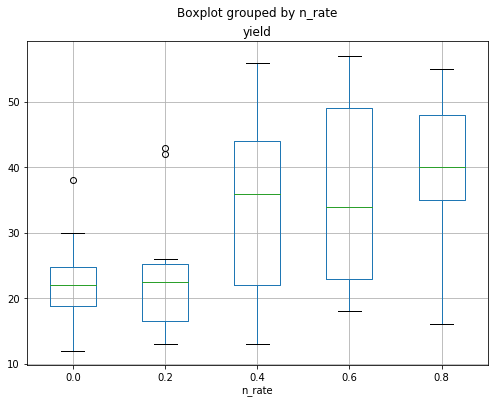

In [483]:
filtered_pecan_data.boxplot('yield', by='n_rate', figsize=(8, 6), fontsize=10)

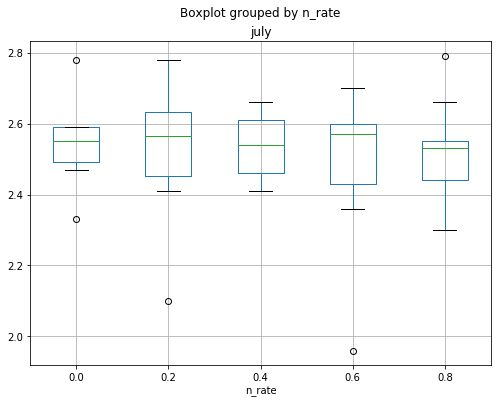

In [487]:
filtered_pecan_data.boxplot('july', by='n_rate', figsize=(8, 6), fontsize=10)

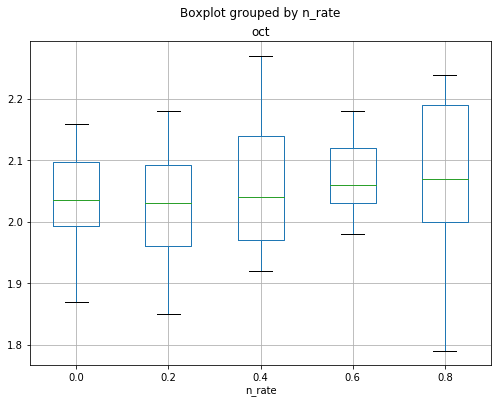

In [488]:
filtered_pecan_data.boxplot('oct', by='n_rate', figsize=(8, 6), fontsize=10)

In [4]:
N=5
july_mean = filtered_pecan_data['july'].mean()
oct_mean = filtered_pecan_data['oct'].mean()
july_std = filtered_pecan_data['july'].std()
oct_std = filtered_pecan_data['oct'].std()
ind = np.arange(N)
width=0.4

p1 = plt.bar(ind, july_mean, width, yerr=july_std, color='cornflowerblue')
p2 = plt.bar(ind, oct_mean, width, yerr=oct_std, color='hotpink')


plt.ylabel('%dry weight of N')
plt.title('Nitrogen content of pecan leaves in July and October')
plt.xticks(ind, ('0', '0.2', '0.4', '0.6', '0.8'))
plt.xlabel('Nitrogen rates')
plt.yticks(np.arange(0, 3.1, 0.5))
plt.legend((p1[0], p2[0]), ('July', 'October'), loc=4, ncol=2, framealpha=1)

plt.show()

NameError: name 'filtered_pecan_data' is not defined